In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bioresponse/svm_benchmark.csv
/kaggle/input/bioresponse/train.csv
/kaggle/input/bioresponse/test.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Read Data

In [3]:
train_data=pd.read_csv('/kaggle/input/bioresponse/train.csv')
test_data=pd.read_csv('/kaggle/input/bioresponse/test.csv')

# Show 5 frist row in data

In [4]:
train_data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


# Show Data describe

In [5]:
train_data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Show Data info

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


# Show data corr

In [7]:
train_data.corr()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,1.000000,-0.086402,0.109226,0.167209,-0.044126,-0.148447,-0.106213,0.137016,0.172226,-0.077743,...,0.010685,0.076465,0.031133,0.016595,0.039768,0.011817,0.029445,0.005669,0.048571,0.021488
D1,-0.086402,1.000000,0.262487,0.328325,0.260002,-0.074244,0.366193,-0.430245,-0.112804,0.189056,...,0.260743,0.221889,0.224236,0.229257,0.225635,0.234814,0.096729,0.164529,0.237026,0.186957
D2,0.109226,0.262487,1.000000,0.439590,0.352263,0.227328,-0.136386,-0.032891,0.141841,-0.354988,...,0.012333,0.075043,0.015788,0.040128,0.045587,0.017283,0.023722,0.043174,0.027019,0.073585
D3,0.167209,0.328325,0.439590,1.000000,0.188451,-0.123794,-0.040728,-0.204815,0.079161,-0.141597,...,0.049737,0.135849,0.037999,0.096788,0.122743,0.021355,0.053000,0.142170,0.008959,0.198354
D4,-0.044126,0.260002,0.352263,0.188451,1.000000,-0.012298,-0.001187,-0.063331,0.064062,-0.035721,...,-0.006225,0.073802,-0.000540,0.040167,0.042837,-0.008171,0.014769,0.027448,0.008766,0.068058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.011817,0.234814,0.017283,0.021355,-0.008171,-0.118609,0.165540,-0.140998,-0.010961,0.143035,...,0.580641,0.329251,0.552293,0.562141,0.289023,1.000000,0.249335,0.101371,0.422945,0.262122
D1773,0.029445,0.096729,0.023722,0.053000,0.014769,-0.097684,0.114388,-0.092395,0.021939,0.092533,...,0.430405,0.228236,0.214677,0.248383,0.243572,0.249335,1.000000,0.325325,0.293441,0.333455
D1774,0.005669,0.164529,0.043174,0.142170,0.027448,-0.105049,0.124192,-0.089671,0.024235,0.087579,...,0.394892,0.295706,0.156499,0.305436,0.148392,0.101371,0.325325,1.000000,0.300667,0.411980
D1775,0.048571,0.237026,0.027019,0.008959,0.008766,-0.137316,0.144459,-0.096429,0.019008,0.121252,...,0.548875,0.376011,0.403716,0.483157,0.368829,0.422945,0.293441,0.300667,1.000000,0.182508


# Show Data contain null data

In [8]:
data_null=pd.DataFrame(train_data.isnull().sum(),columns=['Number of null'])
data_null['percentage']=(train_data.isnull().sum())/len(train_data)*100
data_null

,Number of null,percentage
Activity,0,0.0
D1,0,0.0
D2,0,0.0
D3,0,0.0
D4,0,0.0
...,...,...
D1772,0,0.0
D1773,0,0.0
D1774,0,0.0
D1775,0,0.0



# Show data contain duplicate data

In [9]:
train_data.duplicated().sum()

0

# Show distrubtion of Activity

<AxesSubplot:xlabel='Activity', ylabel='count'>

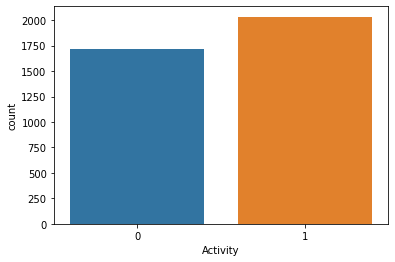

In [10]:
sns.countplot(x='Activity',data=train_data)

# Show input X and output y

In [11]:
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]
key=X.keys()

# Show X

In [12]:
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


# Show y

In [13]:
y

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64

# Split Data

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,shuffle=True,random_state=33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2813, 1776)
(2813,)
(938, 1776)
(938,)


# Applying RandomForestClassifier Model

In [15]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=33)

# Calculating Details

In [16]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9996445076430857
RandomForestClassifierModel Test Score is :  0.7974413646055437
RandomForestClassifierModel features importances are :  [2.15894898e-03 6.02499898e-03 2.79765443e-03 ... 2.77379375e-05
 0.00000000e+00 1.27233025e-05]


# Applying KNeighborsClassifier Model

In [17]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 3,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Calculating Details

In [18]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8663348738002133
KNNClassifierModel Test Score is :  0.7356076759061834


# Applying DecisionTreeClassifier Model

In [19]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=33)

# Calculating Details

In [20]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.9868467827941699
DecisionTreeClassifierModel Test Score is :  0.746268656716418
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.0023399 0.        0.        ... 0.        0.        0.       ]


# Calculating Prediction

In [21]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 0 0 1 1 1 1 1 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.25166911 0.74833089]
 [0.845432   0.154568  ]
 [0.6227425  0.3772575 ]
 [0.24386897 0.75613103]
 [0.25       0.75      ]
 [0.23550421 0.76449579]
 [0.20079452 0.79920548]
 [0.35       0.65      ]
 [0.60413259 0.39586741]
 [0.66719742 0.33280258]]


# Calculating Confusion Matrix

In [22]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[340, 111],
       [ 79, 408]])

# drawing confusion matrix

<AxesSubplot:>

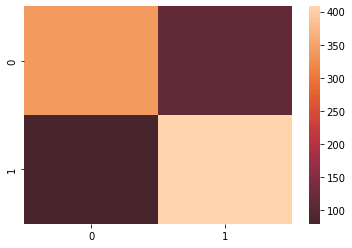

In [23]:
sns.heatmap(CM, center = True)

# Calculating Confusion Matrix

In [24]:
CM = confusion_matrix(y_train,RandomForestClassifierModel.predict(X_train))
CM

array([[1266,    0],
       [   1, 1546]])

# drawing confusion matrix

<AxesSubplot:>

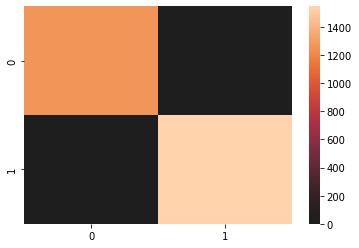

In [25]:
sns.heatmap(CM, center = True)

# Calculating Accuracy Score : ((TP + TN) / float(TP + TN + FP + FN))

In [26]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  748


# Calculating F1 Score : 2 (precision recall) / (precision + recall)

In [27]:
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.7974413646055436


# Calculating Recall Score : (Sensitivity) (TP / float(TP + FN)) 1 / 1+2

In [28]:
RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  0.7974413646055437


# Calculating Precision Score : (Specificity) #(TP / float(TP + FP))

In [29]:
PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.7974413646055437


# Calculating classification Report

In [30]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.81      0.75      0.78       451
           1       0.79      0.84      0.81       487

    accuracy                           0.80       938
   macro avg       0.80      0.80      0.80       938
weighted avg       0.80      0.80      0.80       938



# y_test predict

In [31]:
y_test=RandomForestClassifierModel.predict(test_data)
y_prob=RandomForestClassifierModel.predict_proba(test_data)

# y_prob

In [32]:
prob=[]
for i,j in y_prob:
    if i>j:
        prob.append(i)
    else:
        prob.append(j)
prob      

[0.87,
 0.8491574025289778,
 0.6005487873660462,
 0.8895663082437276,
 0.842433874495155,
 0.6291666666666668,
 0.8919250719879218,
 0.6576276359600445,
 0.8488960820380705,
 0.5670433436532507,
 0.57,
 0.7445085470085471,
 0.6665324384787472,
 0.609767441860465,
 0.67,
 0.8572042370749757,
 0.7580118953510258,
 0.7,
 0.5286067222120109,
 0.8,
 0.7419344167304652,
 0.92,
 0.8384932461873638,
 0.91888310073531,
 0.79,
 0.6014314683840299,
 0.8430811335403727,
 0.6165851507286435,
 0.7526538036529334,
 0.5213274336625385,
 0.5847497695852535,
 0.8117638933349076,
 0.5558406662503512,
 0.5496178793006204,
 0.5154192546583851,
 0.967388888888889,
 0.8876543209876543,
 0.74,
 0.8996776212832551,
 0.8891574025289778,
 0.5625503663003663,
 0.8884882614980972,
 0.6595121951219513,
 0.8775138033394702,
 0.9226810777628063,
 0.638980459770115,
 0.8291574025289777,
 0.5485649122807018,
 0.9497539032749428,
 0.5693548387096774,
 0.8392054794520547,
 0.926692744875666,
 0.9449519230769231,
 0.83966

# y_prob to csv

In [33]:
MoleculeId=list(range(1,test_data.shape[0]+1))
submission=pd.DataFrame(prob,columns=['PredictedProbability'])
submission['MoleculeId']=MoleculeId
submission.to_csv('1.csv')
submission=pd.read_csv('1.csv',index_col='MoleculeId')
submission=submission.drop('Unnamed: 0',axis=1)
submission.to_csv('/kaggle/working/svm_benchmark.csv')
submission

,PredictedProbability
MoleculeId,
1,0.870000
2,0.849157
3,0.600549
4,0.889566
5,0.842434
...,...
2497,0.712727
2498,0.793618
2499,0.971738
